## 問題40

In [2]:
import CaboCha
import re

cabocha=CaboCha.Parser()
with open('neko.txt','r',encoding='utf-8') as neko,open('neko.txt.cabocha','w',encoding='utf-8') as nekocabocha:
    for line in neko.readlines():
        nekocabocha.write(cabocha.parse(line).toString(CaboCha.FORMAT_LATTICE))

class Morph:
    def __init__(self,surface,base,pos,pos1):
        self.surface=surface
        self.base=base
        self.pos=pos
        self.pos1=pos1
    def print_morph(self):
        print(self.surface+self.base+self.pos+self.pos1)
    def get_surface(self):
        return self.surface
    def get_base(self):
        return self.base
    def get_pos(self):
        return self.pos
    def get_pos1(self):
        return self.pos1


morph_lists=[]
with open('neko.txt.cabocha','r',encoding='utf-8') as f:
    morph_list=[]
    for line in f.readlines():
        if line !="EOS\n" and line[0]!="*":
            line=line.split('\t')
            surface=line[0]
            line=line[1].split(',')
            morph=Morph(surface,line[6],line[0],line[1])
            morph_list.append(morph)
        elif line=="EOS\n" and morph_list:
            morph_lists.append(morph_list)
            morph_list=[]

for morph in morph_lists[2]:
    morph.print_morph()

名前名前名詞一般
はは助詞係助詞
まだまだ副詞助詞類接続
無い無い形容詞自立
。。記号句点


## 問題41

In [3]:
class Chunk:
    def __init__(self,morphs,dst,srcs):
        self.morphs=morphs
        self.dst=dst
        self.srcs=srcs
    def add_morph(self,morph):
        self.morphs.append(morph)
    def get_allsurface(self):
        str=""
        for i in self.morphs:
            str=str+i.get_surface()
        return str
    def get_wordsurface(self):
        return re.sub(r'[、。\s]','',self.get_allsurface())
    def get_dst(self):
        return self.dst
    def get_srcs(self):
        return self.srcs
    def check_noun(self):
        flag=0
        for morph in self.morphs:
            if morph.get_pos()=="名詞":
                flag=1
        return flag
    def check_verb(self):
        flag=0
        for morph in self.morphs:
            if morph.get_pos()=="動詞":
                flag=1
        return flag
    def get_noun(self):
        ans=False
        for morph in self.morphs:
            if morph.get_pos()=="名詞":
                ans=morph
                break
        return ans
    def get_leftverb(self):
        ans=False
        for morph in self.morphs:
            if morph.get_pos()=="動詞":
                ans=morph
                break
        return ans
    def get_allparticle(self):
        ans=[]
        for morph in self.morphs:
            if morph.get_pos()=="助詞":
                ans.append(morph)
        return ans
    def s_noun_and_wo(self):
        ans=False
        for i in range(len(self.morphs)-1):
            if self.morphs[i].get_pos1()=='サ変接続' and self.morphs[i+1].get_pos()=='助詞' and self.morphs[i+1].get_surface()=='を':
                ans=self.morphs[i].get_surface()+'を'
        return ans

morph_lists=[]
chunk_lists=[]
with open('neko.txt.cabocha','r',encoding='utf-8') as f:
    morph_list=[]
    chunk_list=[]
    morphs=[]
    chunk=Chunk([],-10,0)
    for line in f.readlines():
        if line !="EOS\n" and line[0]!="*":
            line=line.split('\t')
            surface=line[0]
            line=line[1].split(',')
            morph=Morph(surface,line[6],line[0],line[1])
            morph_list.append(morph)
            if int(chunk.get_dst())!=-10:
                chunk.add_morph(morph)
        elif line=="EOS\n" and morph_list:
            morph_lists.append(morph_list)
            morph_list=[]
            if int(chunk.get_dst())!=-10:
                chunk_list.append(chunk)
                chunk=Chunk([],-10,0)
            chunk_lists.append(chunk_list)
            chunk_list=[]
        elif line[0]=="*":
            if int(chunk.get_dst())!=-10:
                chunk_list.append(chunk)
                chunk=Chunk([],-10,0)
            line=line.split("D")[0]
            line=line.split(" ")
            chunk=Chunk([],line[2],line[1])
            
for chunk in chunk_lists[7]:
    if chunk.get_dst()!=-1:
        print(chunk.get_allsurface()+",dst:"+str(chunk.get_dst())+",srcs:"+str(chunk.get_srcs()))


この,dst:1,srcs:0
書生というのは,dst:7,srcs:1
時々,dst:4,srcs:2
我々を,dst:4,srcs:3
捕えて,dst:5,srcs:4
煮て,dst:6,srcs:5
食うという,dst:7,srcs:6
話である。,dst:-1,srcs:7


## 問題42

In [4]:
chunk_list=chunk_lists[7]
for chunk in chunk_list:
    if int(chunk.get_dst()) != -1:
        chunk2=chunk_list[int(chunk.get_dst())]
        print(chunk.get_allsurface()+"\t"+chunk2.get_allsurface())

この	書生というのは
書生というのは	話である。
時々	捕えて
我々を	捕えて
捕えて	煮て
煮て	食うという
食うという	話である。


## 問題43

In [5]:
chunk_list=chunk_lists[7]

for chunk in chunk_list:
    chunk2=chunk_list[int(chunk.get_dst())]
    if chunk.check_noun() and chunk2.check_verb():
        print(chunk.get_wordsurface()+"\t"+chunk2.get_wordsurface())

我々を	捕えて


## 問題44

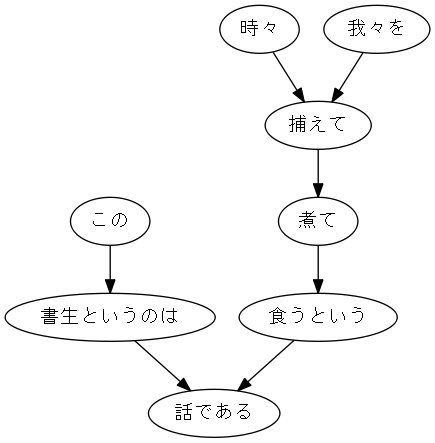

In [6]:
import pydotplus
from IPython.display import Image
with open('44.dot','w',encoding='utf-8') as f:
    f.write('digraph G {\n')
    f.write('graph [fontname = \"MS Gothic\"];\n')
    f.write('node [fontname = \"MS Gothic\"];\n')
    f.write('edge [fontname = \"MS Gothic\"];\n')
    for chunk in chunk_list:
        chunk2=chunk_list[int(chunk.get_dst())]
        if int(chunk.get_dst())!=-1:
            f.write("\""+str(chunk.get_wordsurface())+"\""+" -> "+"\""+str(chunk2.get_wordsurface())+"\"\n")
        else:
            f.write("\""+str(chunk.get_wordsurface())+"\"\n")
    f.write('}\n')

graph = pydotplus.graphviz.graph_from_dot_file('44.dot')
graph.write_png('44.png')
Image('44.png')

## 問題45

In [7]:
def verb_perticle(chunk_list):
    sentence=""
    mark="verb:"
    for chunk in chunk_list[::-1]:
        verb=chunk.get_leftverb()
        if verb:
            sentence=sentence+mark+verb.get_surface()+"\t\n"
        if chunk_list[int(chunk.get_dst())].check_verb():
            verb=chunk_list[int(chunk.get_dst())].get_leftverb()
            for word in chunk.get_allparticle():
                sentence=re.sub(r'(%s%s\t)' % (mark,verb.get_surface()),r'\1%s '% word.get_base(),sentence)
    sentence=re.sub(r'%s.*?\t\n'% mark,'',sentence)
    sentence=re.sub(mark,"",sentence)
    return sentence

sentence=""
for chunk_list in chunk_lists:
    sentence=sentence+verb_perticle(chunk_list)

with open('5-45.txt','w',encoding='utf-8') as f:
    f.write(sentence)

$ sort 5-45.txt|uniq -c|sort -rn |head -n10<br>
    364 云う    と<br>
    237 し      を<br>
    121 思っ    と<br>
    117 ある    が<br>
    107 する    を<br>
    101 見る    て<br>
     96 し      に<br>
     75 なっ    に<br>
     69 見え    と<br>
     67 思う    と<br>



$ grep "見る" 5-45.txt |sort|uniq -c|sort -rn |head -n10<br>
    101 見る    て<br>
     39 見る    を<br>
      9 見る    から<br>
      7 見る    て て<br>
      6 見る    で<br>
      6 見る    て を<br>
      4 見る    は て<br>
      2 見る    は て を<br>
      2 見る    は て て<br>
      2 見る    ので て<br>

$ grep "する" 5-45.txt |sort|uniq -c|sort -rn |head -n10<br>
    107 する    を<br>
     29 する    に<br>
     27 する    が<br>
     25 する    と<br>
     23 する    て を<br>
     20 する    て<br>
     17 する    を に<br>
     16 する    が を<br>
     15 する    で<br>
     14 する    と を<br>

$ grep "与える" 5-45.txt |sort|uniq -c|sort -rn |head -n10<br>
      2 与える  に を<br>
      1 与える  は て に を<br>
      1 与える  に を け<br>
      1 与える  と か じゃあ は て を<br>
      1 与える  て たり に を<br>
      1 与える  けれども は に を<br>
      1 与える  が を<br>
      1 与える  が て は は と て に を から<br>

## 問題46

In [ ]:
def verb_perticle2(chunk_list):
    sentence=""
    mark="verb:"
    for chunk in chunk_list[::-1]:
        verb=chunk.get_leftverb()
        if verb:
            sentence=sentence+mark+verb.get_surface()+"\t\t\n"
        perticle_list=chunk.get_allparticle()
        if perticle_list and chunk_list[int(chunk.get_dst())].check_verb():
            verb=chunk_list[int(chunk.get_dst())].get_leftverb()
            for word in perticle_list:
                sentence=re.sub(r'(%s%s\t)' % (mark,verb.get_surface()),r'\1%s '% word.get_base(),sentence)
            sentence=re.sub(r'(%s%s\t.*\t)' % (mark,verb.get_surface()),r'\1%s '% chunk.get_wordsurface(),sentence)
    sentence=re.sub(r'%s.*?\t\n'% mark,'',sentence)
    sentence=re.sub(mark,"",sentence)
    return sentence

sentence=""
for chunk_list in chunk_lists:
    sentence=sentence+verb_perticle2(chunk_list)

with open('5-46.txt','w',encoding='utf-8') as f:
    f.write(sentence)

$ head 5-46.txt<br>
つか    か が   生れたか 見当が<br>
生れ    で      　どこで<br>
し      て は だけ て   泣いて いた事だけは 記憶している<br>
泣い    で      所で<br>
見      は を   吾輩は ものを<br>
始め    で      ここで<br>
聞く    で      あとで<br>
食う    て      煮て<br>
煮      て      捕えて<br>
捕え    を      我々を<br>

## 問題47

In [12]:
def verb_perticle3(chunk_list):
    sentence=""
    mark="verb:"
    for chunk in chunk_list:
        verb=chunk_list[int(chunk.get_dst())].get_leftverb()
        if verb:
            tmp=chunk.s_noun_and_wo()
            if tmp:
                sentence=sentence+tmp+mark+verb.get_base()+"\t\t\n"
    for chunk in chunk_list:
        perticle_list=chunk.get_allparticle()
        if perticle_list and not chunk.s_noun_and_wo() and chunk_list[int(chunk.get_dst())].check_verb():
            verb=chunk_list[int(chunk.get_dst())].get_leftverb()
            for word in perticle_list:
                sentence=re.sub(r'(%s%s\t)' % (mark,verb.get_base()),r'\1%s '% word.get_base(),sentence)
            sentence=re.sub(r'(%s%s\t.*\t)' % (mark,verb.get_base()),r'\1%s '% chunk.get_wordsurface(),sentence)
    sentence=re.sub(r'%s.*?\t\n'% mark,'',sentence)
    sentence=re.sub(mark,"",sentence)
    return sentence

sentence=""
for chunk_list in chunk_lists:
    sentence=sentence+verb_perticle3(chunk_list)

with open('5-47.txt','w',encoding='utf-8') as f:
    f.write(sentence)
with open('5-47.txt','r',encoding='utf-8') as f:
    for line in f.readlines()[:15:]:
        print(line,end="")

決心をする	と 	こうと 
返報をする	んで 	偸んで 
昼寝を昼寝をする	が 	彼が 
迫害を加える	て 	追い廻して 
生活をする	を て は に を が 	これを 戦って するには 愛を 我等猫族が 
話をする	で が から 	我儘で 主人が 思い出したから 
投書をする	へ て 	ほととぎすへ やって 
話をする	に 	時に 
写生を昼寝をする	て 	出て 
彩色を欠伸をする	て て の へ を て から 	押し出して して 存分の 前へ 両足を 失敬して なったから 
報道をする	に くらい も 	耳に くらいなら 我儘も 
挨拶を御馳走を食う	と 	見ると 
問答を雑談をする	の て で は と て ながら は の 	下のごとく 向って あとで 彼は していると 寝転びながら 黒は 例のごとく 
自慢をする	て に を て 	鳴らして 感心したように 気焔を あって 
呼吸を飲み込む	から て 	なってから 


$ cat 5-47.txt|cut -f 1 |sort|uniq -c|sort -rn|head<br>
     23 返事をする<br>
     16 挨拶をする<br>
      9 話をする<br>
      6 質問をする<br>
      6 喧嘩をする<br>
      5 運動をする<br>
      5 真似をする<br>
      5 相談をする<br>
      4 降参をする<br>
      4 質問をかける<br>

$ cat 5-47.txt|cut -f 1,2|sort|uniq -c|sort -rn|head<br>
      3 返事をする      と<br>
      3 挨拶をする      と<br>
      2 返事をする      と は<br>
      2 講釈をする      ね て は に も て か<br>
      2 放蕩をする      も より が から<br>
      2 挨拶をする      から<br>
      2 喧嘩をする      と<br>
      2 同情を表する    て は と<br>
      1 食事を支度をする        と よ と よ<br>
      1 鞭撻を加える    て ば は て て から<br>

## 問題48

In [13]:
def noun_path(chunk_list):
    sentence=""
    for chunk in chunk_list:
        if chunk.check_noun():
            sentence=sentence+chunk.get_wordsurface()
            tmp=chunk
            while int(tmp.get_dst())!=-1:
                tmp=chunk_list[int(tmp.get_dst())]
                sentence=sentence+" -> "+tmp.get_wordsurface()
            sentence=sentence+"\n"
    return sentence

sentence=""
for chunk_list in chunk_lists[:10:]:
    sentence=sentence+noun_path(chunk_list)+"\n"

for line in sentence.split('\n')[:100:]:
    print(line)

一

吾輩は -> 猫である
猫である

名前は -> 無い

どこで -> 生れたか -> つかぬ
見当が -> つかぬ

何でも -> 薄暗い -> 所で -> 泣いて -> 記憶している
所で -> 泣いて -> 記憶している
ニャーニャー -> 泣いて -> 記憶している
いた事だけは -> 記憶している
記憶している

吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た

あとで -> 聞くと -> 種族であったそうだ
それは -> 種族であったそうだ
書生という -> 人間中で -> 種族であったそうだ
人間中で -> 種族であったそうだ
一番 -> 獰悪な -> 種族であったそうだ
獰悪な -> 種族であったそうだ
種族であったそうだ

書生というのは -> 話である
我々を -> 捕えて -> 煮て -> 食うという -> 話である
話である

当時は -> なかったから -> 思わなかった
何という -> 考も -> なかったから -> 思わなかった
考も -> なかったから -> 思わなかった

彼の -> 掌に -> 載せられて -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである
掌に -> 載せられて -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである
スーと -> 持ち上げられた -> 時 -> フワフワした -> 感じが -> あったばかりである
時 -> フワフワした -> 感じが -> あったばかりである
感じが -> あったばかりである




## 問題49

In [14]:
def noun_unit(chunk_list):
    noun_unit=""
    for i,chunk in enumerate(chunk_list):
        x=chunk.get_noun()
        if x:
            for chunk2 in chunk_list[i+1::]:
                y=chunk2.get_noun()
                if y:
                    tmp=re.sub(x.get_surface(),"X",chunk.get_wordsurface())+"|"+re.sub(y.get_surface(),"Y",chunk2.get_wordsurface())+"|"
                    tmp_1=chunk
                    tmp_2=chunk2
                    flag=False
                    while int(tmp_1.get_dst())!=-1 or int(tmp_2.get_dst())!=-1:
                        if int(tmp_1.get_dst()) > int(tmp_2.get_dst()) or int(tmp_1.get_dst())==-1:
                            tmp_2=chunk_list[int(tmp_2.get_dst())]
                            if tmp_1==tmp_2:
                                flag=True
                                break
                            tmp=re.sub(r'([^\|]*\|[^\|]*)(\|[^\|]*)',r'\1%s%s \2' % ("-> ",tmp_2.get_wordsurface()),tmp)
                        else:
                            tmp_1=chunk_list[int(tmp_1.get_dst())]
                            if tmp_1==tmp_2:
                                flag=True
                                break
                            tmp=re.sub(r'([^\|]*)(\|[^\|]*\|[^\|]*)',r'\1%s%s \2' % ("-> ",tmp_1.get_wordsurface()),tmp)
                    if flag:
                        tmp=re.sub(r'-> %s' % tmp_1.get_wordsurface(),"",tmp)
                        if tmp_2==chunk2:
                            tmp=re.sub(r'([^\|]*)\|([^\|]*)\|',r'\1 %s \2'%"->",tmp)
                        else:
                            tmp=re.sub(r'([^\|]*\|[^\|]*\|)',r'\1 %s'% tmp_1.get_wordsurface(),tmp)
                        noun_unit=noun_unit+tmp+"\n"
    return noun_unit

print(noun_unit(chunk_lists[5]))


Xは |Yで-> 始めて -> 人間という -> ものを | 見た
Xは |Yという-> ものを | 見た
Xは |Yを| 見た
Xで-> 始めて  -> Yという
Xで-> 始めて -> 人間という  -> Yを
Xという -> Yを

